In [1]:
import os

In [2]:
data_dir='C:\\Users\\Midhun\\Desktop\\python\\Projects\\Pedestrian\\data'

In [3]:
os.listdir(data_dir)

['train', 'validation']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [10]:
train_path=data_dir+'\\train\\'
validation_path=data_dir+'\\validation\\'

In [11]:
validation_path

'C:\\Users\\Midhun\\Desktop\\python\\Projects\\Pedestrian\\data\\validation\\'

In [12]:
os.listdir(validation_path)

['no pedestrian', 'pedestrian']

In [13]:
os.listdir(train_path)

['no pedestrian', 'pedestrian']

In [14]:
os.listdir(train_path+'pedestrian')[0]

'pic1 (1).jpg'

In [16]:
pedestrian=train_path+'pedestrian\\'+'pic1 (1).jpg'
imread(pedestrian)
#png converted into an array

array([[[ 39,  53,  38],
        [ 16,  30,  15],
        [ 30,  42,  32],
        ...,
        [108, 130,  68],
        [ 67,  87,  34],
        [ 67,  87,  38]],

       [[ 26,  40,  25],
        [ 13,  27,  12],
        [  5,  17,   5],
        ...,
        [ 95, 117,  55],
        [ 54,  74,  21],
        [ 64,  84,  35]],

       [[ 19,  33,  16],
        [ 20,  34,  19],
        [  1,  13,   1],
        ...,
        [ 86, 107,  48],
        [ 63,  83,  32],
        [ 55,  74,  28]],

       ...,

       [[ 68,  88, 115],
        [ 68,  88, 115],
        [ 67,  87, 114],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]],

       [[ 71,  88, 114],
        [ 74,  91, 117],
        [ 66,  83, 109],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]],

       [[ 71,  88, 114],
        [ 74,  91, 117],
        [ 66,  83, 109],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]]

In [17]:
imread(pedestrian).shape

(138, 364, 3)

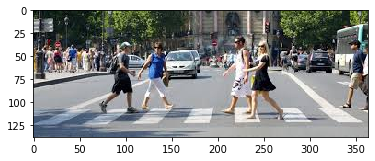

In [18]:
plt.imshow(imread(pedestrian))

In [19]:
os.listdir(train_path+'no pedestrian')[0]

'train (1).jpg'

In [20]:
nopedestrian=train_path+'no pedestrian\\'+'train (1).jpg'

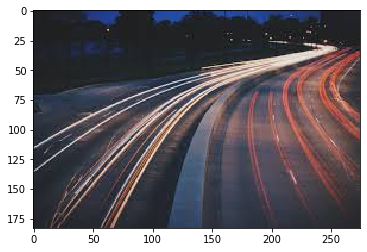

In [21]:
plt.imshow(imread(nopedestrian))

In [22]:
pwd

'C:\\Users\\Midhun\\Desktop\\python\\Projects\\Pedestrian'

In [23]:
len(os.listdir(train_path+'pedestrian'))

631

In [25]:
len(os.listdir(train_path+'no pedestrian'))

631

In [27]:
len(os.listdir(validation_path+'pedestrian'))
len(os.listdir(validation_path+'no pedestrian'))

177

In [29]:
#images will be of different dimesnions
dim1=[]
dim2=[]

for image_filename in os.listdir(validation_path+'pedestrian'):
    
    img=imread(validation_path+'pedestrian\\'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [30]:
#image files are different
dim1[0:10]

[183, 182, 188, 192, 186, 177, 183, 225, 193, 189]

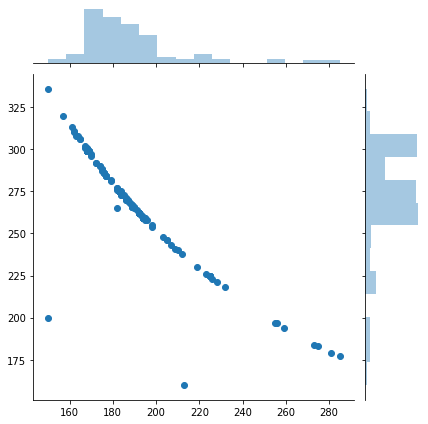

In [31]:
sns.jointplot(dim1,dim2)

In [32]:
#images should be resized to avg
np.mean(dim1)

187.1864406779661

In [33]:
np.mean(dim2)

271.1412429378531

In [34]:
image_shape=(130,130,3)

In [35]:
dim1=[]
dim2=[]

for image_filename in os.listdir(train_path+'pedestrian'):
    
    img=imread(train_path+'pedestrian\\'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [36]:
dim1[0:10]

[138, 137, 163, 151, 166, 169, 167, 183, 162, 177]

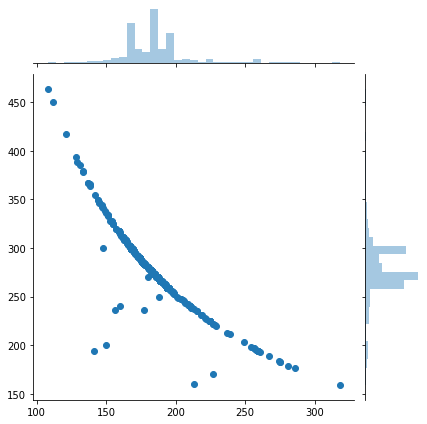

In [37]:
sns.jointplot(dim1,dim2)

In [38]:
np.mean(dim1)

182.96513470681458

In [39]:
np.mean(dim2)

277.8399366085578

In [40]:
image_shape=(200,200,3)

## Data Preprocessing

In [41]:
200*200*3

120000

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
#help(ImageDataGenerator)

In [45]:
imread(pedestrian).max()
#no need to rescale if needed put rescale =1/n

255

In [49]:
#facial not need to shift/rotate
image_gen=ImageDataGenerator(rescale=1/255,shear_range=0.1,
                            zoom_range=0.1,horizontal_flip=True,
                            fill_mode='nearest')

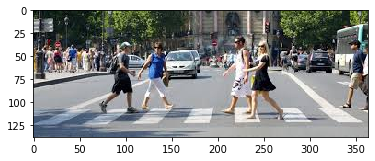

In [51]:
pedestrian=imread(pedestrian)
plt.imshow(pedestrian)

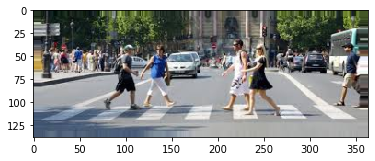

In [52]:
plt.imshow(image_gen.random_transform(pedestrian))

In [53]:
#augment the dataset 
#used to increase the dataset range
#check notebook for the belw, directory to be categorized this to work
image_gen.flow_from_directory(train_path)

Found 1262 images belonging to 2 classes.


In [54]:
image_gen.flow_from_directory(validation_path)

Found 354 images belonging to 2 classes.


## Model Creation

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [91]:
#check the link for model creation in orginal notebook
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #same as adding activation in 2nd para
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [95]:
batch_size=16
image_shape[:2]

(200, 200)

In [96]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',
                                               batch_size=batch_size,class_mode='binary')

Found 1262 images belonging to 2 classes.


In [97]:
val_image_gen = image_gen.flow_from_directory(validation_path,target_size=image_shape[:2],color_mode='rgb',
                                               batch_size=batch_size,class_mode='binary',shuffle=False)
#you should'nt shuffle th image

Found 354 images belonging to 2 classes.


In [98]:
train_image_gen.class_indices

{'no pedestrian': 0, 'pedestrian': 1}

In [99]:
results=model.fit_generator(train_image_gen,epochs=50,validation_data=val_image_gen,callbacks=[early_stop])

Epoch 1/50
79/79 [==============================] - 112s 1s/step - loss: 0.6895 - accuracy: 0.5523 - val_loss: 0.6331 - val_accuracy: 0.6328
Epoch 2/50
79/79 [==============================] - 110s 1s/step - loss: 0.5717 - accuracy: 0.7258 - val_loss: 0.6327 - val_accuracy: 0.6893
Epoch 3/50
79/79 [==============================] - 109s 1s/step - loss: 0.4915 - accuracy: 0.7718 - val_loss: 0.5694 - val_accuracy: 0.7627
Epoch 4/50
79/79 [==============================] - 109s 1s/step - loss: 0.4420 - accuracy: 0.7971 - val_loss: 0.4711 - val_accuracy: 0.8023
Epoch 5/50
79/79 [==============================] - 109s 1s/step - loss: 0.3743 - accuracy: 0.8352 - val_loss: 0.5320 - val_accuracy: 0.7825
Epoch 6/50
79/79 [==============================] - 107s 1s/step - loss: 0.3832 - accuracy: 0.8320 - val_loss: 0.4422 - val_accuracy: 0.8023
Epoch 7/50
79/79 [==============================] - 108s 1s/step - loss: 0.3504 - accuracy: 0.8399 - val_loss: 0.5411 - val_accuracy: 0.7853
Epoch 8/50
79

In [100]:
losses=pd.DataFrame(model.history.history)

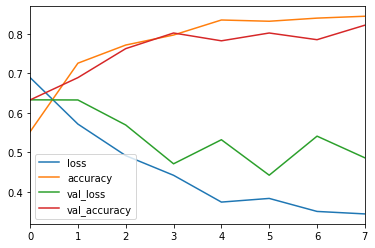

In [101]:
losses.plot()

In [102]:
model.evaluate_generator(val_image_gen)

[0.4927414778781974, 0.8276836]

In [103]:
model.metrics_names

['loss', 'accuracy']

In [104]:
pred=model.predict_generator(val_image_gen)

In [105]:
pred #it is probability value

array([[2.35291570e-01],
       [1.32953823e-02],
       [3.14368606e-02],
       [3.37930322e-02],
       [7.71600008e-02],
       [1.25667453e-03],
       [7.18478799e-01],
       [6.53064251e-03],
       [1.14011228e-01],
       [2.21583813e-01],
       [2.06310153e-02],
       [2.89379776e-01],
       [2.82115936e-02],
       [1.56459212e-03],
       [3.96537781e-03],
       [4.15751934e-02],
       [1.31970614e-01],
       [5.42491376e-02],
       [6.53219521e-02],
       [4.83717263e-01],
       [4.27433252e-02],
       [1.61749572e-01],
       [1.38464600e-01],
       [2.03377813e-01],
       [4.03419137e-02],
       [1.66347921e-02],
       [4.72378731e-03],
       [1.99976116e-01],
       [3.10939550e-03],
       [1.06388330e-03],
       [2.04750001e-01],
       [1.89564794e-01],
       [3.04746062e-01],
       [3.69610548e-01],
       [2.71296799e-02],
       [1.27354950e-01],
       [4.21068728e-01],
       [7.20511377e-02],
       [1.42943949e-01],
       [2.13278532e-02],


In [106]:
predictions=pred>0.5
# we can play around with the model

In [115]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
val_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [110]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       177
           1       0.92      0.71      0.80       177

    accuracy                           0.82       354
   macro avg       0.84      0.82      0.82       354
weighted avg       0.84      0.82      0.82       354



In [111]:
confusion_matrix(val_image_gen.classes,predictions)

array([[166,  11],
       [ 51, 126]], dtype=int64)

In [112]:
pedestrian

array([[[ 39,  53,  38],
        [ 16,  30,  15],
        [ 30,  42,  32],
        ...,
        [108, 130,  68],
        [ 67,  87,  34],
        [ 67,  87,  38]],

       [[ 26,  40,  25],
        [ 13,  27,  12],
        [  5,  17,   5],
        ...,
        [ 95, 117,  55],
        [ 54,  74,  21],
        [ 64,  84,  35]],

       [[ 19,  33,  16],
        [ 20,  34,  19],
        [  1,  13,   1],
        ...,
        [ 86, 107,  48],
        [ 63,  83,  32],
        [ 55,  74,  28]],

       ...,

       [[ 68,  88, 115],
        [ 68,  88, 115],
        [ 67,  87, 114],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]],

       [[ 71,  88, 114],
        [ 74,  91, 117],
        [ 66,  83, 109],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]],

       [[ 71,  88, 114],
        [ 74,  91, 117],
        [ 66,  83, 109],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]]

In [1]:
from tensorflow.keras.preprocessing import image
pedestrian

NameError: name 'pedestrian' is not defined

In [114]:
image.load_img(pedestrian)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [87]:
my_image=image.load_img(pedestrian,target_size=image_shape)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

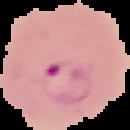

In [101]:
my_image

In [102]:
my_image_array=image.img_to_array(my_image)

In [103]:
my_image_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [104]:
my_image_array.shape 

(130, 130, 3)

In [105]:
#need to be (1,130,130,3)
my_image_array=np.expand_dims(my_image_array,axis=0)

In [106]:
my_image_array.shape

(1, 130, 130, 3)

In [107]:
model.predict(my_image_array)

array([[0.]], dtype=float32)

In [108]:
train_image_gen.class_indicesices

{'parasitized': 0, 'uninfected': 1}